## Overview/To-Do

This one tries a different, more realistic detecor layouout.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
from BurstCube.LocSim.GRB import *
from BurstCube.LocSim.Detector import *
from BurstCube.LocSim.Spacecraft import *
from BurstCube.LocSim.Stats import calcNorms, addErrors, calcNormsWithError

## Set up
These are actually the default pointings but I put it here to show you how to set up various detectors.  Just six, smaller detectors this time.

In [3]:
#Evenly spaced around azimuth
#Staggered in zenith
#Arbitrary type
pointings = {'01': ('60:0:0','10:0:0'),
            '02': ('120:0:0','15:0:0'),
            '03': ('180:0:0','20:0:0'),
            '04': ('240:0:0','10:0:0'),
            '05': ('300:0:0','15:0:0'),
            '06': ('360:0:0','20:0:0')}

Set up a spacecraft object with the pointings of the detector you've decided on.  The spacecraft defaults to a position above DC at an elevation of 550 km (about the orbit of Fermi).

In [4]:
spacecraft = Spacecraft(pointings)

Set up some points in RA/Dec to calculate exposures and then access the 'exposure' function of the detector objects within the spacecraft object to plot the exposure.

In [5]:
res = 250
rr,dd = np.meshgrid(np.linspace(0,360,res,endpoint=False),np.linspace(-90,90,res))
exposure_positions = np.vstack([rr.ravel(),dd.ravel()])

In [6]:
exposures = np.array([[detector.exposure(position[0],position[1]) for position in exposure_positions.T] 
                      for detector in spacecraft.detectors])

/usr/local/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/usr/local/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()


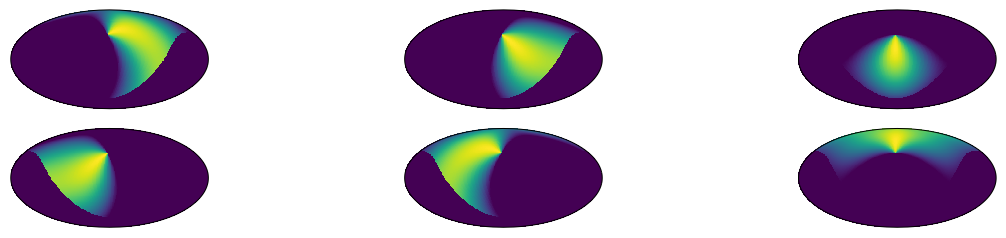

In [7]:
plt.figure(figsize=(20,4))
m = Basemap(projection='moll',lon_0=180.,resolution='c')
x,y = m(rr,dd)
for sp in range(6):
    plt.subplot(2, 3, sp+1)
    m.pcolormesh(x,y,exposures[sp].reshape((res,res)))
plt.show()

/usr/local/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/usr/local/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


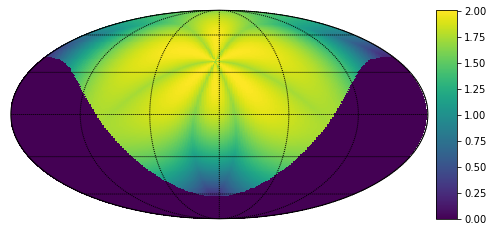

In [8]:
plt.figure(figsize=(8,10))
m = Basemap(projection='moll',lon_0=180,resolution='c')
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
x,y = m(rr,dd)
m.pcolormesh(x,y,exposures.sum(axis=0).reshape((res,res)))
m.colorbar()
plt.show()

In [9]:
rr,dd = np.meshgrid(np.linspace(0,360,55,endpoint=False),np.linspace(-90,90,55))
training_positions = np.vstack([rr.ravel(),dd.ravel()])

In [10]:
exposures = np.array([[detector.exposure(position[0],position[1]) for position in training_positions.T] 
                      for detector in spacecraft.detectors])

In [11]:
training_grbs = [GRB(position[0],position[1]) for position in training_positions.T[exposures.sum(axis=0) > 0.]]

/usr/local/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/usr/local/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


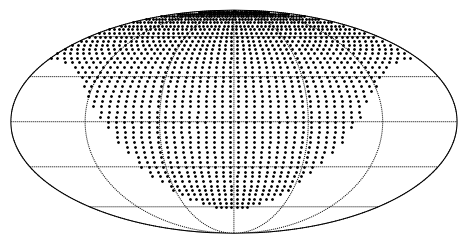

In [12]:
pos = np.array([[grb.eph._ra*180./np.pi,grb.eph._dec*180./np.pi] for grb in training_grbs])
plt.figure(figsize=(8,10))
m = Basemap(projection='moll',lon_0=180,resolution='c')
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
x,y = m(pos[:,0],pos[:,1])
m.scatter(x,y,3,marker='o',color='k')
plt.show()

In [13]:
training_counts = spacecraft.throw_grbs(training_grbs,scaled=True)

/Users/jsperki1/.local/lib/python3.6/site-packages/BurstCube/LocSim/Spacecraft.py:80: RuntimeWarning: invalid value encountered in true_divide
  for idx,rec in enumerate(grb_rec)]


## Setup and throw a random sample of GRBs

Note that I'm only throwing them in the north since the Earth blocks the south.

In [17]:
real_positions = np.array(list(zip(360.*np.random.random_sample(2000),180.*np.random.random_sample(2000)-90.)))

In [18]:
exposures = np.array([[detector.exposure(position[0],position[1]) for position in real_positions]
                      for detector in spacecraft.detectors])

In [19]:
real_grbs = [GRB(position[0],position[1]) for position in real_positions[exposures.sum(axis=0) > 0.]]

In [20]:
np.shape(real_grbs)

(1129,)

In [21]:
real_counts = spacecraft.throw_grbs(real_grbs, scaled=True)

/Users/jsperki1/.local/lib/python3.6/site-packages/BurstCube/LocSim/Spacecraft.py:80: RuntimeWarning: invalid value encountered in true_divide
  for idx,rec in enumerate(grb_rec)]


/usr/local/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/usr/local/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


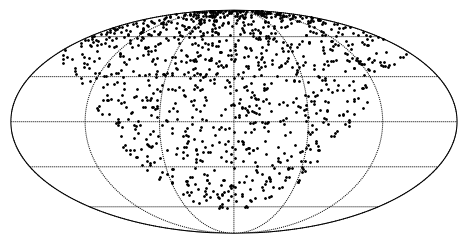

In [22]:
pos = np.array([[grb.eph._ra*180./np.pi,grb.eph._dec*180./np.pi] for grb in real_grbs])
plt.figure(figsize=(8,10))
m = Basemap(projection='moll',lon_0=180,resolution='c')
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
x,y = m(pos[:,0],pos[:,1])
m.scatter(x,y,3,marker='o',color='k')
plt.show()

In [23]:
norms = calcNorms(real_counts,training_counts)

In [24]:
real_counts_err = addErrors(real_counts,training_counts)

In [25]:
norms_errp, norms_errm = calcNormsWithError(real_counts,training_counts,real_counts_err)

Find the minimum distance of each GRB.

In [26]:
loc_mins = [norm.argmin() for norm in norms]
loc_mins_errm = [norm.argmin() for norm in norms_errm]
loc_mins_errp = [norm.argmin() for norm in norms_errp]

Now, calculate the distance from the real GRB to the training one picked out from the distance measuremnt above.

In [27]:
errors = [eph.separation(grb.eph,training_grbs[loc_mins[idx]].eph)*180./np.pi for idx,grb in enumerate(real_grbs)]
errors_errm = [eph.separation(grb.eph,training_grbs[loc_mins_errm[idx]].eph)*180./np.pi for idx,grb in enumerate(real_grbs)]
errors_errp = [eph.separation(grb.eph,training_grbs[loc_mins_errp[idx]].eph)*180./np.pi for idx,grb in enumerate(real_grbs)]

Plot and save the cumulative distribution of this error.

[]

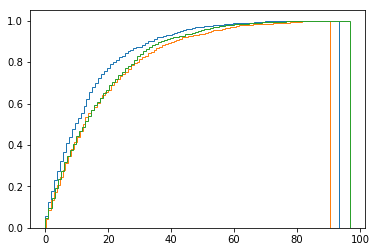

In [28]:
hist_data = plt.hist(errors,bins=100,normed=1, histtype='step', cumulative=True)
hist_data_errm = plt.hist(errors_errm,bins=100,normed=1, histtype='step', cumulative=True)
hist_data_errp = plt.hist(errors_errp,bins=100,normed=1, histtype='step', cumulative=True)
plt.plot()

The 1-sigma error is around 68%.  Quick function to find the distance value that most closely matches 0.68.

In [29]:
avg_stat = np.average([hist_data_errm[1][np.abs(hist_data_errm[0] - 0.68).argmin()],
                       hist_data_errp[1][np.abs(hist_data_errp[0] - 0.68).argmin()]])

In [31]:
print('Systematic Error: {:,.2f}'.format(hist_data[1][np.abs(hist_data[0] - 0.68).argmin()]))

Systematic Error: 14.97


In [32]:
print('Statistical Error: {:,.2f}'.format(avg_stat))

Statistical Error: 20.63
